<a href="https://colab.research.google.com/github/ShreyasG27/ML-prac/blob/main/42260_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image


In [2]:
golf_df = pd.DataFrame()

#add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy',
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

#add temperature
golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

#add humidity
golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

#add windy
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

#finally add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
                  'yes', 'yes', 'no']

print(golf_df)


     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no


In [3]:
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])#print the new dummy data
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier()# Training the Decision Tree
clf_train = clf.fit(one_hot_data, golf_df['Play'])

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Outlook_overcast <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Play", fillcolor="#a7d3f3"] ;
1 [label="Humidity_high <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = Not_Play", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Windy_true <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Play", fillcolor="#6ab6ec"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Play", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="Outlook_sunny <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not_Play", fillcolor="#ffffff"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not_Play", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Play", fillcolor="#399de5"] ;
4 -> 6 ;
7 [label="Outlook_sunny <= 0.5\ngini = 0.32

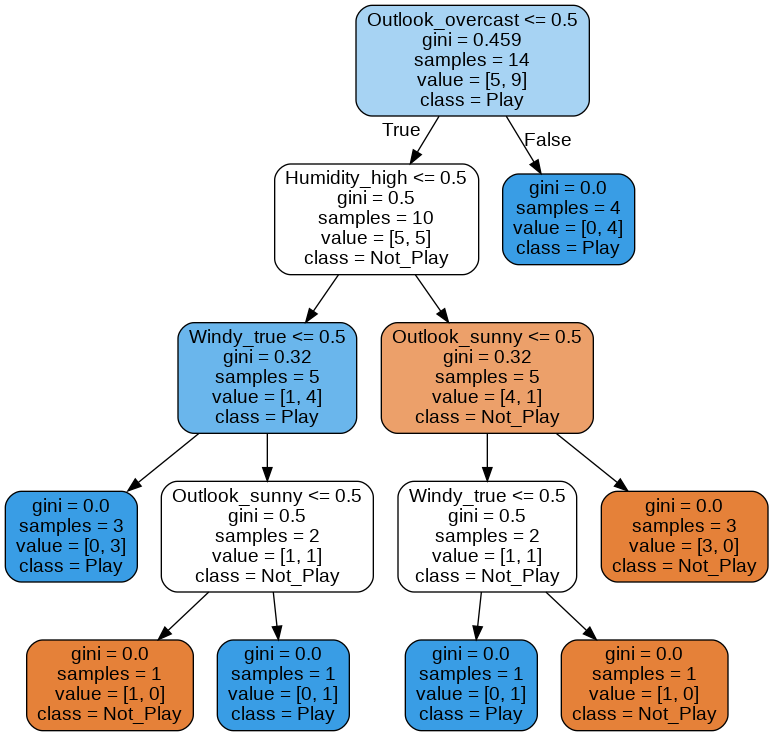

In [5]:
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), class_names=['Not_Play', 'Play'], rounded=True, filled=True)
print(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [6]:
prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1,0]])
prediction

array(['yes'], dtype=object)